Portfolio weight allocation through Sharpe Ratio optimization
Investment Universe: JUNIORBEES, NIFTYBEES, GOLDBEES, RRSLGETF

In [345]:
#Import relevant libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt

style.use('ggplot')
# import os, sys
# print(os.getcwd())

In [120]:
start = dt.datetime(2015,1,1)
end = dt.datetime.now()


# df = web.DataReader("NSE/JUNIORBEES", 'quandl', start, end)

#Fetch data from yahoo and save under DataFrame named 'data'
stock = ['JUNIORBEES', 'NIFTYBEES', 'GOLDBEES', 'RRSLGETF']
stock[0] = web.DataReader(str("NSE/" + stock[0]), 'quandl', start, end)
stock[1] = web.DataReader(str("NSE/" + stock[1]), 'quandl', start, end)
stock[2] = web.DataReader(str("NSE/" + stock[2]), 'quandl', start, end)
stock[3] = web.DataReader(str("NSE/" + stock[3]), 'quandl', start, end)
# NIFTY 4-8 yr G-Sec Index
# data = web.DataReader(stock,data_source="yahoo",start='12/01/2017',end='12/31/2017')['Adj Close']


print(stock[0].head())
print(stock[0].tail())

# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

              Open    High     Low    Last   Close  TotalTradeQuantity  \
Date                                                                     
2019-01-04  286.00  286.70  283.25  286.00  285.77             65275.0   
2019-01-03  287.25  288.74  284.50  284.95  285.18             51214.0   
2019-01-02  291.00  291.00  286.25  287.62  287.45             55273.0   
2019-01-01  290.00  292.00  288.30  289.99  289.71             32952.0   
2018-12-31  288.00  292.00  288.00  290.83  290.77             23708.0   

            TurnoverLacs  
Date                      
2019-01-04        186.02  
2019-01-03        146.36  
2019-01-02        159.28  
2019-01-01         95.41  
2018-12-31         68.94  
              Open    High     Low    Last   Close  TotalTradeQuantity  \
Date                                                                     
2015-01-07  187.90  187.90  183.24  183.24  183.98             27284.0   
2015-01-06  188.15  189.88  183.52  186.90  186.46             23311.0

In [121]:
# stock[3] = web.DataReader(str("NSE/RRSLGETF"), 'quandl', start, end)
# data = web.DataReader(stock,data_source="yahoo",start='12/01/2017',end='12/31/2017')['Adj Close']


# print(stock[3].head())
# print(stock[3].tail())

# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

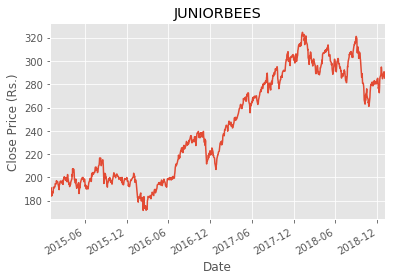

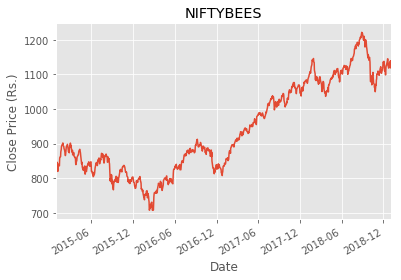

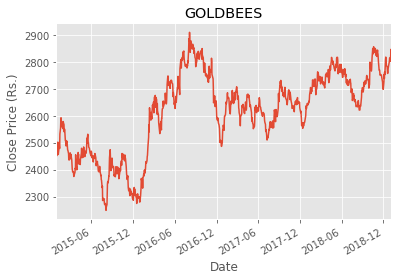

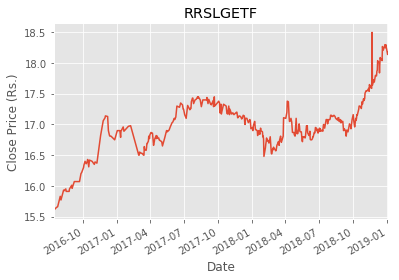

In [122]:
stock[0]['Close'].plot()
plt.title("JUNIORBEES")
plt.xlabel("Date")
plt.ylabel("Close Price (Rs.)")
plt.show()

stock[1]['Close'].plot()
plt.title("NIFTYBEES")
plt.xlabel("Date")
plt.ylabel("Close Price (Rs.)")
plt.show()

stock[2]['Close'].plot()
plt.title("GOLDBEES")
plt.xlabel("Date")
plt.ylabel("Close Price (Rs.)")
plt.show()

stock[3]['Close'].plot()
plt.title("RRSLGETF")
plt.xlabel("Date")
plt.ylabel("Close Price (Rs.)")
plt.show()



In [123]:
data = pd.concat([stock[0]['Close'],stock[1]['Close'],stock[2]['Close'],stock[3]['Close']], axis=1)
data.columns = ['JUNIORBEES', 'NIFTYBEES', 'GOLDBEES', 'RRSLGETF']
data.head()

,JUNIORBEES,NIFTYBEES,GOLDBEES,RRSLGETF
Date,,,,
2015-01-01,189.03,838.14,2456.35,NaN
2015-01-02,190.47,847.14,2451.20,NaN
2015-01-05,191.22,844.93,2466.20,NaN
2015-01-06,186.46,823.88,2497.90,NaN
2015-01-07,183.98,819.95,2502.20,NaN


In [134]:
#Arrange the data in ascending order
data=data.iloc[::-1]
data.head()

,JUNIORBEES,NIFTYBEES,GOLDBEES,RRSLGETF
Date,,,,
2015-01-01,189.03,838.14,2456.35,NaN
2015-01-02,190.47,847.14,2451.20,NaN
2015-01-05,191.22,844.93,2466.20,NaN
2015-01-06,186.46,823.88,2497.90,NaN
2015-01-07,183.98,819.95,2502.20,NaN


In [135]:
#Compute stock returns and print the returns in percentage format
stock_ret = data.pct_change()
print (stock_ret.head().round(4)*100)

            JUNIORBEES  NIFTYBEES  GOLDBEES  RRSLGETF
Date                                                 
2015-01-01         NaN        NaN       NaN       NaN
2015-01-02        0.76       1.07     -0.21       NaN
2015-01-05        0.39      -0.26      0.61       NaN
2015-01-06       -2.49      -2.49      1.29       NaN
2015-01-07       -1.33      -0.48      0.17       NaN


In [183]:
#Calculate mean returns and covariances of all four the stocks
mean_returns = stock_ret.mean()
cov_matrix = stock_ret.cov()
print(mean_returns.round(4)*100)
print("\n")
print(cov_matrix)
print("\n")
print(stock_ret.corr())

JUNIORBEES    0.05
NIFTYBEES     0.03
GOLDBEES      0.02
RRSLGETF      0.04
dtype: float64


            JUNIORBEES  NIFTYBEES  GOLDBEES  RRSLGETF
JUNIORBEES    0.000111   0.000063 -0.000010  0.000009
NIFTYBEES     0.000063   0.000066 -0.000011  0.000003
GOLDBEES     -0.000010  -0.000011  0.000045 -0.000002
RRSLGETF      0.000009   0.000003 -0.000002  0.000032


            JUNIORBEES  NIFTYBEES  GOLDBEES  RRSLGETF
JUNIORBEES    1.000000   0.734806 -0.141685  0.170400
NIFTYBEES     0.734806   1.000000 -0.209864  0.072702
GOLDBEES     -0.141685  -0.209864  1.000000 -0.049684
RRSLGETF      0.170400   0.072702 -0.049684  1.000000


In [137]:
#Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
num_iterations = 1000000
simulation_res = np.zeros((4+len(stock)-1,num_iterations))

In [138]:
for i in range(num_iterations):

    #Select random weights and normalize to set the sum to 1
    weights = np.array(np.random.random(4))
    weights /= np.sum(weights)
    
    #Calculate the return and standard deviation for every step
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
        
    #Store all the results in a defined array
    simulation_res[0,i] = portfolio_return
    simulation_res[1,i] = portfolio_std_dev
        
    #Calculate Sharpe ratio and store it in the array
    simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
        
        
    #Save the weights in the array
    for j in range(len(weights)):
        simulation_res[j+3,i] = weights[j]

In [139]:
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe','JUNIORBEES', 'NIFTYBEES', 'GOLDBEES', 'RRSLGETF'])
sim_frame.head()

,ret,stdev,sharpe,JUNIORBEES,NIFTYBEES,GOLDBEES,RRSLGETF
0,0.000392,0.005729,0.068346,0.272647,0.298258,0.005775,0.423321
1,0.000309,0.005120,0.060429,0.108875,0.516390,0.257871,0.116863
2,0.000373,0.004847,0.076870,0.292591,0.127774,0.142973,0.436663
3,0.000335,0.004647,0.072190,0.183337,0.326917,0.217343,0.272403
4,0.000332,0.004714,0.070425,0.171087,0.360020,0.220070,0.248824


In [140]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]

In [141]:
print(max_sharpe)

ret           0.000329
stdev         0.003835
sharpe        0.085752
JUNIORBEES    0.073219
NIFTYBEES     0.170841
GOLDBEES      0.244669
RRSLGETF      0.511271
Name: 55161, dtype: float64


In [142]:
#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print("The portfolio for max Sharpe Ratio:\n", str(max_sharpe))
print("\n")
print("The portfolio for min risk:\n", str(min_std))

The portfolio for max Sharpe Ratio:
 ret           0.000329
stdev         0.003835
sharpe        0.085752
JUNIORBEES    0.073219
NIFTYBEES     0.170841
GOLDBEES      0.244669
RRSLGETF      0.511271
Name: 55161, dtype: float64


The portfolio for min risk:
 ret           0.000293
stdev         0.003596
sharpe        0.081553
JUNIORBEES    0.000272
NIFTYBEES     0.239402
GOLDBEES      0.359817
RRSLGETF      0.400510
Name: 7653, dtype: float64


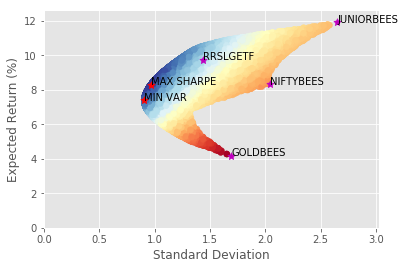

In [353]:
#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.scatter(sim_frame.stdev*252,sim_frame.ret*252*100,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return (%)')
plt.ylim(0,.0005*252*100)
plt.xlim(0,0.012*252)

#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1]*252,max_sharpe[0]*252*100,marker=(5,1,0),color='r',s=60)
plt.text(max_sharpe[1]*252, max_sharpe[0]*252*100, 'MAX SHARPE')

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(min_std[1]*252,min_std[0]*252*100,marker=(5,1,0),color='r',s=60)
plt.text(min_std[1]*252, min_std[0]*252*100, 'MIN VAR')

# plot individual stock sharpe ratios
plt.scatter(stock_ret.std()[0]*252,stock_ret.mean()[0]*252*100,marker=(5,1,0),color='m',s=60)
plt.text(stock_ret.std()[0]*252, stock_ret.mean()[0]*252*100, 'JUNIORBEES')

plt.scatter(stock_ret.std()[1]*252,stock_ret.mean()[1]*252*100,marker=(5,1,0),color='m',s=60)
plt.text(stock_ret.std()[1]*252, stock_ret.mean()[1]*252*100, 'NIFTYBEES')

plt.scatter(stock_ret.std()[2]*252,stock_ret.mean()[2]*252*100,marker=(5,1,0),color='m',s=60)
plt.text(stock_ret.std()[2]*252, stock_ret.mean()[2]*252*100, 'GOLDBEES')

plt.scatter(stock_ret.std()[3]*252,stock_ret.mean()[3]*252*100,marker=(5,1,0),color='m',s=60)
plt.text(stock_ret.std()[3]*252, stock_ret.mean()[3]*252*100, 'RRSLGETF')


plt.show()

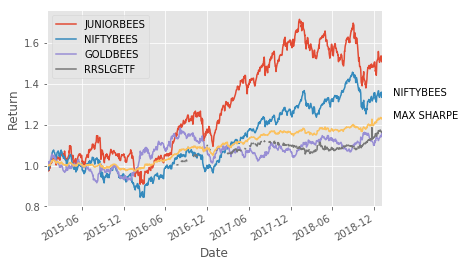

In [344]:
# Returns Calculation
(1+stock_ret).cumprod().plot()
(1+((stock_ret*max_sharpe[3:7]).sum(axis=1))).cumprod().plot()
plt.text(end,(1+stock_ret).cumprod().NIFTYBEES[-1],'NIFTYBEES')
plt.text(end,(1+((stock_ret*max_sharpe[3:7]).sum(axis=1))).cumprod()[-1],'MAX SHARPE')

plt.xlabel("Date")
plt.ylabel("Return")

plt.show()
